<a href="https://colab.research.google.com/github/davidclizbe/datascience/blob/master/Clizbe_MCA_and_FAMD_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prince

# Dimensionality Reduction: MCA & FAMD Assignment

In [ ]:
import prince
import pandas as pd

### Import the HR data set 

In [ ]:
data_url = 'https://drive.google.com/uc?export=download&id=1DdwoOD_JfheYWG4xVFvYjEiqj2usZ52P'

In [ ]:
data = pd.read_csv(data_url)

data

,Age,Pay Rate,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Days Employed,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,30,28.50,MA,1450,Female,Married,US Citizen,No,Black or African American,3317,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,34,23.00,MA,1460,Male,Divorced,US Citizen,No,Black or African American,1420,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,31,29.00,MA,2703,Male,Single,US Citizen,No,White,1154,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,32,21.50,MA,2170,Female,Married,US Citizen,No,White,58,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,30,16.56,MA,2330,Female,Single,US Citizen,No,White,940,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,48,52.25,MA,2056,Male,Single,US Citizen,No,Asian,289,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,36,51.00,MA,1887,Male,Single,US Citizen,No,Asian,284,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,34,46.00,MA,2045,Male,Single,US Citizen,No,White,284,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,30,45.00,MA,2134,Male,Married,US Citizen,No,White,220,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Identify which columns in the data are numeric and which are categorical.

Correct any columns that have been misassigned a numeric data type when they should be categorical.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                310 non-null    int64  
 1   Pay Rate           310 non-null    float64
 2   State              310 non-null    object 
 3   Zip                310 non-null    int64  
 4   Sex                310 non-null    object 
 5   MaritalDesc        310 non-null    object 
 6   CitizenDesc        310 non-null    object 
 7   Hispanic/Latino    310 non-null    object 
 8   RaceDesc           310 non-null    object 
 9   Days Employed      310 non-null    int64  
 10  Reason For Term    310 non-null    object 
 11  Employment Status  310 non-null    object 
 12  Department         310 non-null    object 
 13  Position           310 non-null    object 
 14  Manager Name       310 non-null    object 
 15  Employee Source    310 non-null    object 
 16  Performance Score  310 non

In [ ]:
data_cat = data.drop(['Age', 'Pay Rate', 'Days Employed'], axis=1)
data_cat

,State,Zip,Sex,MaritalDesc,CitizenDesc,Hispanic/Latino,RaceDesc,Reason For Term,Employment Status,Department,Position,Manager Name,Employee Source,Performance Score
0,MA,1450,Female,Married,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,MA,1460,Male,Divorced,US Citizen,No,Black or African American,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,MA,2703,Male,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,MA,2170,Female,Married,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,MA,2330,Female,Single,US Citizen,No,White,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,MA,2056,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
306,MA,1887,Male,Single,US Citizen,No,Asian,N/A - still employed,Active,IT/IS,Senior BI Developer,Brian Champaigne,Indeed,Fully Meets
307,MA,2045,Male,Single,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets
308,MA,2134,Male,Married,US Citizen,No,White,N/A - still employed,Active,IT/IS,BI Developer,Brian Champaigne,Indeed,Fully Meets


### Pull out the categorical variables and note the dimensions of the data set.

In [ ]:
data_cat.shape

(310, 14)

### Reduce these categorical features down to two dimensions using MCA.

In [ ]:
model = prince.MCA(n_components=2)
model.fit(data_cat)


MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

### Plot the coordinates of each resulting dimension.

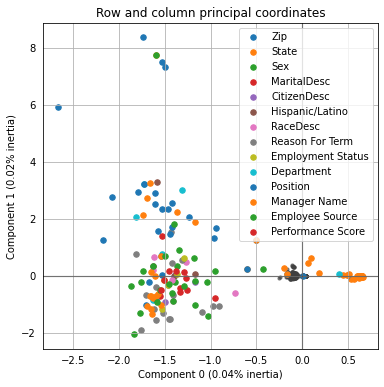

In [ ]:
model.plot_coordinates(data_cat)

### One hot encode the categorical features and note the change in dimensions in the data set.

In [ ]:
model.plot_coordinates

### Reduce the one hot encoded categorical features down to two dimensions using MCA.

In [ ]:
data_cat_onehot = pd.get_dummies(data_cat)
data_cat_onehot

,Zip,State_AL,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,State_MA,State_ME,State_MT,State_NC,State_ND,State_NH,State_NV,State_NY,State_OH,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,Sex_Female,Sex_Male,MaritalDesc_Divorced,MaritalDesc_Married,MaritalDesc_Separated,MaritalDesc_Single,MaritalDesc_Widowed,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,Hispanic/Latino_No,...,Manager Name_Jennifer Zamora,Manager Name_John Smith,Manager Name_Kelley Spirea,Manager Name_Ketsia Liebig,Manager Name_Kissy Sullivan,Manager Name_Lynn Daneault,Manager Name_Michael Albert,Manager Name_Peter Monroe,Manager Name_Simon Roup,Manager Name_Webster Butler,Employee Source_Billboard,Employee Source_Careerbuilder,Employee Source_Company Intranet - Partner,Employee Source_Diversity Job Fair,Employee Source_Employee Referral,Employee Source_Glassdoor,Employee Source_Indeed,Employee Source_Information Session,Employee Source_Internet Search,Employee Source_MBTA ads,Employee Source_Monster.com,Employee Source_Newspager/Magazine,Employee Source_On-campus Recruiting,Employee Source_On-line Web application,Employee Source_Other,Employee Source_Pay Per Click,Employee Source_Pay Per Click - Google,Employee Source_Professional Society,Employee Source_Search Engine - Google Bing Yahoo,Employee Source_Social Networks - Facebook Twitter etc,Employee Source_Vendor Referral,Employee Source_Website Banner Ads,Employee Source_Word of Mouth,Performance Score_90-day meets,Performance Score_Exceeds,Performance Score_Exceptional,Performance Score_Fully Meets,Performance Score_N/A- too early to review,Performance Score_Needs Improvement,Performance Score_PIP
0,1450,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1460,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
2,2703,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2170,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2330,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2056,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
306,1887,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
307,2045,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
308,2134,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
model2 = prince.MCA(n_components=2)
model2.fit(data_cat_onehot)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

### Plot the coordinates of each resulting dimension.

ZeroDivisionError: ignored

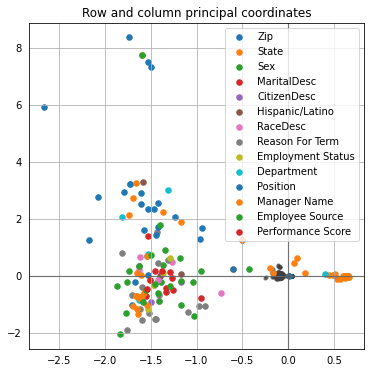

In [ ]:
model2.plot_coordinates(data_cat_onehot)

### Use FAMD to reduce the entire data set (both the categorical and numeric features) down to two dimensions.

### Plot the coordinates of each resulting dimension, color-coding the plot points according to Employment Status.